In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
from datetime import datetime
import json
from bs4 import BeautifulSoup
import requests
%matplotlib inline

In [4]:
#read data into pandas df
bitcoin = pd.read_csv('bitcoin_price.csv')
ethereum = pd.read_csv('ethereum_price.csv')
litecoin = pd.read_csv('litecoin_price.csv')
monero = pd.read_csv('monero_price.csv')
ripple = pd.read_csv('ripple_price.csv')
nem = pd.read_csv('nem_price.csv')
dash = pd.read_csv('dash_price.csv')

In [46]:
bitcoin.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Nov 07, 2017",7023.10,7253.32,7023.10,7144.38,"2,326,340,000","117,056,000,000"
1,"Nov 06, 2017",7403.22,7445.77,7007.31,7022.76,"3,111,900,000","123,379,000,000"
2,"Nov 05, 2017",7404.52,7617.48,7333.19,7407.41,"2,380,410,000","123,388,000,000"
3,"Nov 04, 2017",7164.48,7492.86,7031.28,7379.95,"2,483,800,000","119,376,000,000"
4,"Nov 03, 2017",7087.53,7461.29,7002.94,7207.76,"3,369,860,000","118,084,000,000"


In [20]:
def basic_info(curr_type):
    #print(curr_type)
    print(curr_type["Date"][0])
    print(curr_type["Date"][curr_type.shape[0]-1])
    #print(curr_type.head())
    print("-------")
for i in [bitcoin,ethereum,litecoin,monero,ripple,nem,dash]:
    print(basic_info(i))

Nov 07, 2017
Apr 28, 2013
-------
None
Nov 07, 2017
Aug 07, 2015
-------
None
Nov 07, 2017
Apr 28, 2013
-------
None
Nov 07, 2017
May 21, 2014
-------
None
Nov 07, 2017
Aug 04, 2013
-------
None
Nov 07, 2017
Apr 01, 2015
-------
None
Nov 07, 2017
Feb 14, 2014
-------
None


In [41]:
small_t = list(bitcoin["Date"]).index("Nov 01, 2015")
large_t = list(bitcoin["Date"]).index("Nov 01, 2014")

In [45]:
#From Nov 01, 2015 - Nov 01, 2017
bitcoin_s = bitcoin.iloc[0:small_t+1,:]
ethereum_s = ethereum.iloc[0:small_t+1,:]
litecoin_s = litecoin.iloc[0:small_t+1,:]
monero_s = monero.iloc[0:small_t+1,:]
ripple_s = ripple.iloc[0:small_t+1,:]
nem_s = nem.iloc[0:small_t+1,:]
dash_s = dash.iloc[0:small_t+1,:]

#From Nov 01, 2014 - Nov 01, 2017
bitcoin_l = bitcoin.iloc[0:large_t+1,:]
litecoin_l = litecoin.iloc[0:large_t+1,:]
monero_l = monero.iloc[0:large_t+1,:]
ripple_l = ripple.iloc[0:large_t+1,:]
dash_l = dash.iloc[0:large_t+1,:]

In [48]:
small_df = pd.concat([bitcoin_s["Close"], ethereum_s["Close"],litecoin_s["Close"],monero_s["Close"],ripple_s["Close"],nem_s["Close"],dash_s["Close"]], axis=1)
small_df.columns = ["bitcoin","ethereum","litecoin","monero","ripple","nem","dash"]
small_df.head()

,bitcoin,ethereum,litecoin,monero,ripple,nem,dash
0,7144.38,294.66,61.30,99.76,0.210354,0.180246,293.38
1,7022.76,298.89,55.17,102.92,0.205990,0.186642,275.68
2,7407.41,296.26,54.75,86.35,0.202055,0.180309,273.17
3,7379.95,300.47,55.04,87.30,0.203750,0.170845,274.68
4,7207.76,305.71,56.18,87.99,0.208133,0.171728,278.59


In [49]:
small_df.shape

(738, 7)

([<matplotlib.axis.YTick at 0x11047b470>,
 <a list of 7 Text yticklabel objects>)

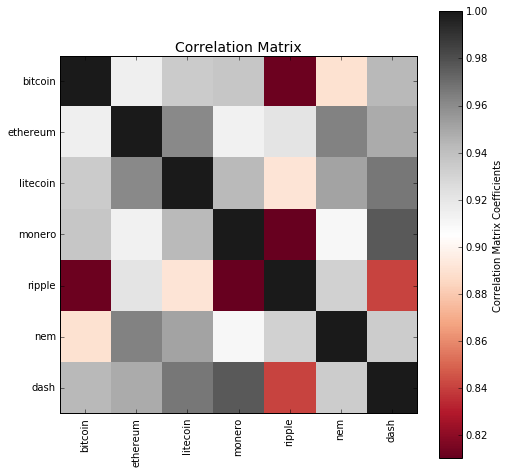

In [50]:
m = small_df.mean(axis=0)
s = small_df.std(ddof=1, axis=0)
 
# normalised time-series as an input for PCA
dfPort = (small_df - m)/s
 
c = np.cov(dfPort.values.T)     # covariance matrix
co = np.corrcoef(small_df.values.T)  # correlation matrix
 
tickers = list(small_df.columns)
 
plt.figure(figsize=(8,8))
plt.imshow(co, cmap="RdGy", interpolation="nearest")
cb = plt.colorbar()
cb.set_label("Correlation Matrix Coefficients")
plt.title("Correlation Matrix", fontsize=14)
plt.xticks(np.arange(len(tickers)), tickers, rotation=90)
plt.yticks(np.arange(len(tickers)), tickers)

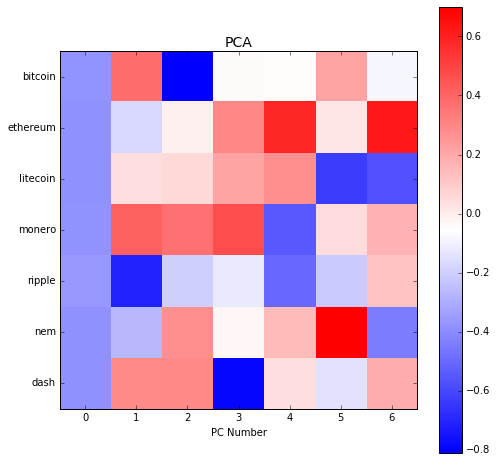

In [51]:
# perform PCA
w, v = np.linalg.eig(c)  
 
ax = plt.figure(figsize=(8,8)).gca()
plt.imshow(v, cmap="bwr", interpolation="nearest")
cb = plt.colorbar()
plt.yticks(np.arange(len(tickers)), tickers)
plt.xlabel("PC Number")
plt.title("PCA", fontsize=14)
# force x-tickers to be displayed as integers (not floats)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

construct the bi-plot of relative weights of each cryptocurrency in the last two PC components (PC-5 and PC-6) arising from a PCA on a covariance matrix

In [56]:
v.shape[0]

7

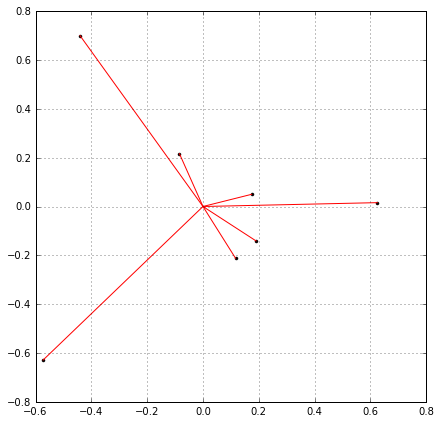

In [53]:
# choose PC-k numbers
k1 = -1  # the last PC column in 'v' PCA matrix
k2 = -2  # the second last PC column
 
# begin constructing bi-plot for PC(k1) and PC(k2)
# loadings
plt.figure(figsize=(7,7))
plt.grid()
 
# compute the distance from (0,0) point
dist = []
for i in range(v.shape[0]):
    x = v[i,k1]
    y = v[i,k2]
    plt.plot(x, y, '.k')
    plt.plot([0,x], [0,y], '-', color="r")
    d = np.sqrt(x**2 + y**2)
    dist.append(d)

we need to identify those cryptocurrencies of the greatest loading. By the threshold I use the mean value of derived distances (NOT SURE HOW TO CHOOSE TRESHOLD??). Next, I check the membership of each coin to quarter number 1, 2, 3 or 4 saving that as tuples in a list of quar. Finally, we finalize the plotting of a bi-plot by adding x and y labels, respectively:

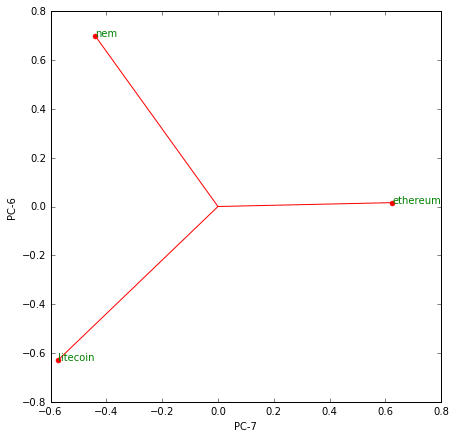

In [65]:
# check and save membership of a coin to
# a quarter number 1, 2, 3 or 4 on the plane
quar = []
plt.figure(figsize=(7,7))

for i in range(v.shape[0]):
    x = v[i,k1]
    y = v[i,k2]
    #plt.plot(x, y, '.k')
    #plt.plot([0,x], [0,y], '-', color="r")
    
    d = np.sqrt(x**2 + y**2)
    if(d > np.mean(dist)):
    #if(d > np.mean(dist) + np.std(dist, ddof=1)):
        plt.plot(x, y, '.r', markersize=10)
        plt.plot([0,x], [0,y], '-', color="r")
        if((x > 0) and (y > 0)):
            quar.append((i, 1))
        elif((x < 0) and (y > 0)):
            quar.append((i, 2))
        elif((x < 0) and (y < 0)):
            quar.append((i, 3))
        elif((x > 0) and (y < 0)):
            quar.append((i, 4))
        plt.text(x, y, tickers[i], color='g')
 
plt.xlabel("PC-" + str(len(tickers)+k1+1))
plt.ylabel("PC-" + str(len(tickers)+k2+1))

we examine linear correlations for such pair of coins (cryptocurrency time-series) making use of two distinct tools, namely, one-factor linear regression (hence its $R^2$ metric) and Kendall’s rank correlation metric of τ.

In [66]:
quar

[(1, 1), (2, 3), (5, 2)]

ethereum litecoin
0.96113646272 0.0
0.657141480624 1.66594281969e-156


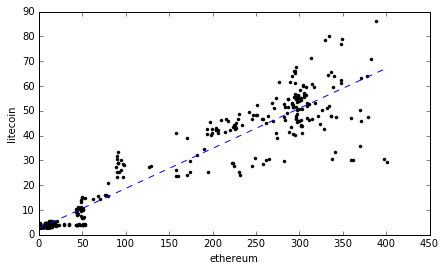

ethereum nem
0.963346233336 0.0
0.755935547802 2.84076249129e-207


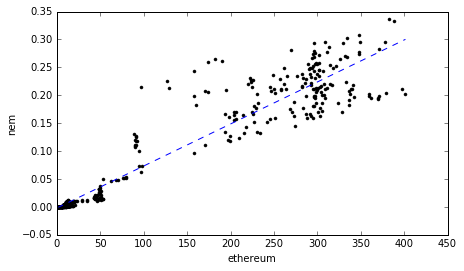

nem litecoin
0.951237779469 0.0
0.66049989118 4.08683184678e-158


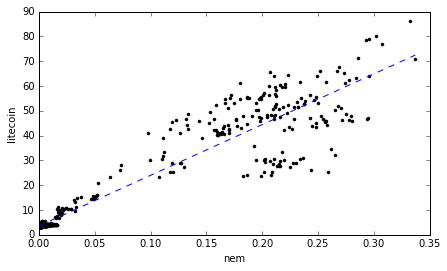

In [68]:
import scipy.stats as stats
for i in range(len(quar)):
    # Q1 vs Q3
    if(quar[i][1] == 1):
        for j in range(len(quar)):
            if(quar[j][1] == 3):
                plt.figure(figsize=(7,4))
 
                # highly correlated coins according to the PC analysis
                print(tickers[quar[i][0]], tickers[quar[j][0]])
 
                ts1 = small_df[tickers[quar[i][0]]]  # time-series
                ts2 = small_df[tickers[quar[j][0]]]
 
                # correlation metrics and their p_values
                slope, intercept, r2, pvalue, _ = stats.linregress(ts1, ts2)
                ktau, kpvalue = stats.kendalltau(ts1, ts2)
                print(r2, pvalue)
                print(ktau, kpvalue)
 
                plt.plot(ts1, ts2, '.k')
                xline = np.linspace(np.min(ts1), np.max(ts1), 100)
                yline = slope*xline + intercept
                plt.plot(xline, yline,'--', color='b')  # linear model fit
                plt.xlabel(tickers[quar[i][0]])
                plt.ylabel(tickers[quar[j][0]])
                plt.show()
                
    # Q1 vs Q2 
    if(quar[i][1] == 1):
        for j in range(len(quar)):
            if(quar[j][1] == 2):
                plt.figure(figsize=(7,4))
                print(tickers[quar[i][0]], tickers[quar[j][0]])
                ts1 = small_df[tickers[quar[i][0]]]
                ts2 = small_df[tickers[quar[j][0]]]
                slope, intercept, r2, pvalue, _ = stats.linregress(ts1, ts2)
                ktau, kpvalue = stats.kendalltau(ts1, ts2)
                print(r2, pvalue)
                print(ktau, kpvalue)
                plt.plot(ts1, ts2, '.k')
                xline = np.linspace(np.min(ts1), np.max(ts1), 100)
                yline = slope*xline + intercept
                plt.plot(xline, yline,'--', color='b')
                plt.xlabel(tickers[quar[i][0]])
                plt.ylabel(tickers[quar[j][0]])
                plt.show()

    # Q2 vs Q3
    if(quar[i][1] == 2):
        for j in range(len(quar)):
            if(quar[j][1] == 3):
                plt.figure(figsize=(7,4))
                print(tickers[quar[i][0]], tickers[quar[j][0]])
                ts1 = small_df[tickers[quar[i][0]]]
                ts2 = small_df[tickers[quar[j][0]]]
                slope, intercept, r2, pvalue, _ = stats.linregress(ts1, ts2)
                ktau, kpvalue = stats.kendalltau(ts1, ts2)
                print(r2, pvalue)
                print(ktau, kpvalue)
                plt.plot(ts1, ts2, '.k')
                xline = np.linspace(np.min(ts1), np.max(ts1), 100)
                yline = slope*xline + intercept
                plt.plot(xline, yline,'--', color='b')
                plt.xlabel(tickers[quar[i][0]])
                plt.ylabel(tickers[quar[j][0]])
                plt.show()

Those plots represent correlated close prices for identified “highly correlated” cryptocurrencies. As we can see, a high degree in linear relationship is confirmed by $R^2 ⪆ 0.9 at τ ⪆ 0.65$ for all of them. 

The correlation matrix reveals a number of coefficient pointing at strong linear correlation and anti-correlation. This is due to the mathematical aspect of orthogonality that is being applied within a PCA itself. Every single PC appears to be linked to different latent factor. The majority of attention has been focused on first two or three PCA principal components. The appealing interpretation has been connected to a common factor responsible for general market variability (PC-1) or some other synchronised fluctuations (PC-2, PC-3).